# ZodiSURF Python Tutorial

This notebook demonstrates the core functionality of the ZodiSURF Python package, a Python implementation of the Kelsall et al. (1998) zodiacal light model with SKYSURF enhancements (O'Brien+2025).

**Key Features:**
- <0.001% difference from IDL reference implementation
- Ability to run the Kelsall et al. (1998) version and the SKYSURF version (O'Brien+2025)

## Setup

First, import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from zodi_model.get_zmod import get_zmod
from zodi_model.solar_sp import solar_sp

print("ZodiModel Tutorial Setup Complete!")

ZodiModel Tutorial Setup Complete!


## Example 1: Basic Single Point Calculation

Calculate zodiacal light intensity at a single point in space and time using the original Kelsall model. The Kelsall model only works for COBE DIRBE's nominal wavelengths: 1.25, 2.2, 3.5, 4.9, 12, 25, 70, 100, 140 and 240 $\mu$m.

In [2]:
# Basic single-point calculation
wavelength = 1.25      # Wavelength in microns (DIRBE J-band)
phase_type = 'kelsall' # Use original Kelsall phase function
day = 100.0           # Day 100 of 1990 (April 10, 1990)
longitude = 90.0      # Ecliptic longitude in degrees
latitude = 0.0        # Ecliptic latitude in degrees

# Calculate zodiacal light intensity
zodi_intensity = get_zmod(wavelength, phase_type, day, longitude, latitude)

print(f"Zodiacal Light Calculation:")
print(f"  Wavelength: {wavelength} μm")
print(f"  Phase function: {phase_type}")
print(f"  Date: Day {day}")
print(f"  Coordinates: ({longitude}°, {latitude}°) ecliptic")
print(f"  Intensity: {zodi_intensity[0]:.6f} MJy/sr")

Zodiacal Light Calculation:
  Wavelength: 1.25 μm
  Phase function: kelsall
  Date: Day 100.0 of 1990
  Coordinates: (90.0°, 0.0°) ecliptic
  Intensity: 0.551839 MJy/sr


## Example 2: SKYSURF Phase Function with Custom Wavelength

Use the enhanced SKYSURF model for any wavelength between 0.2--4.9 $\mu$m, although it is only reliable between 0.2--1.7 $\mu$m.

In [6]:
# Custom wavelength with SKYSURF phase function
custom_wavelength = 0.8  # Custom wavelength (800 nm)
phase_type = 'skysurf'   # Use enhanced SKYSURF model
day = 200.0
longitude = 45.0
latitude = 15.0

# Get solar spectrum value for this wavelength
solar_flux = solar_sp(custom_wavelength)

# Calculate zodiacal light intensity
zodi_intensity = get_zmod(custom_wavelength, phase_type, day, longitude, latitude)

print(f"SKYSURF Model Calculation:")
print(f"  Wavelength: {custom_wavelength} μm")
print(f"  Solar flux estimate: {solar_flux:.2e}")
print(f"  Phase function: {phase_type}")
print(f"  Coordinates: ({longitude}°, {latitude}°) ecliptic")
print(f"  Intensity: {zodi_intensity[0]:.6f} MJy/sr")

SKYSURF Model Calculation:
  Wavelength: 0.8 μm
  Solar flux estimate: 2.40e+08
  Phase function: skysurf
  Coordinates: (45.0°, 15.0°) ecliptic
  Intensity: 0.278890 MJy/sr


## Example 3: Array Processing and Visualization

Process multiple coordinates efficiently and create a simple plot.

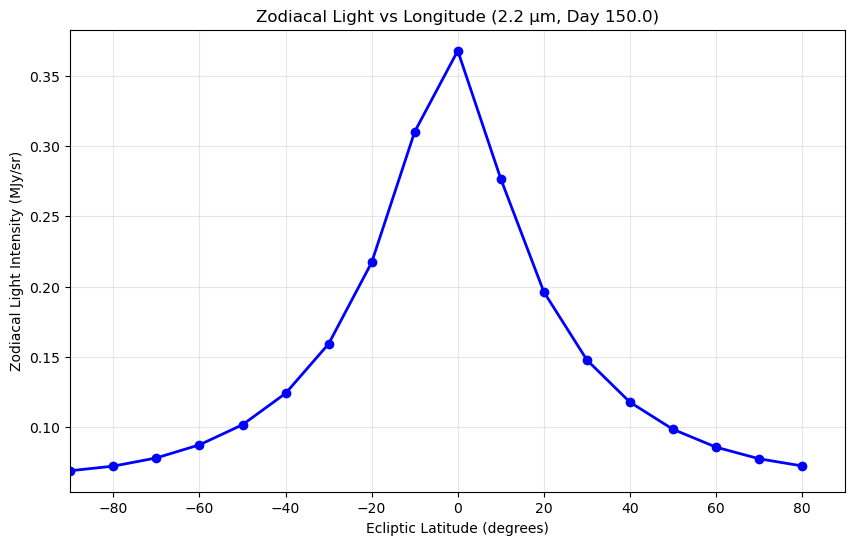

Array Processing Results:
  Number of points: 18
  Mean intensity: 0.147726 MJy/sr
  Min intensity: 0.069056 MJy/sr
  Max intensity: 0.367628 MJy/sr
  Dynamic range: 5.32


In [12]:
# Multiple longitude observations
wavelength = 2.2
phase_type = 'kelsall'
day = 150.0
lon = 0.0  # Every 10 degrees
latitude_array = np.arange(-90, 90, 10)

# Calculate intensities for all longitudes at once
intensities = get_zmod(wavelength, phase_type, day, lon, latitude_array)

# Create a simple plot
plt.figure(figsize=(10, 6))
plt.plot(latitude_array, intensities, 'b-', linewidth=2, marker='o')
plt.xlabel('Ecliptic Latitude (degrees)')
plt.ylabel('Zodiacal Light Intensity (MJy/sr)')
plt.title(f'Zodiacal Light vs Longitude ({wavelength} μm, Day {day})')
plt.grid(True, alpha=0.3)
plt.xlim(-90,90)
plt.show()

# Print summary statistics
print(f"Array Processing Results:")
print(f"  Number of points: {len(intensities)}")
print(f"  Mean intensity: {np.mean(intensities):.6f} MJy/sr")
print(f"  Min intensity: {np.min(intensities):.6f} MJy/sr")
print(f"  Max intensity: {np.max(intensities):.6f} MJy/sr")
print(f"  Dynamic range: {np.max(intensities)/np.min(intensities):.2f}")

## Example 4: Phase Function Comparison

Compare the Kelsall and SKYSURF models at the same wavelength.

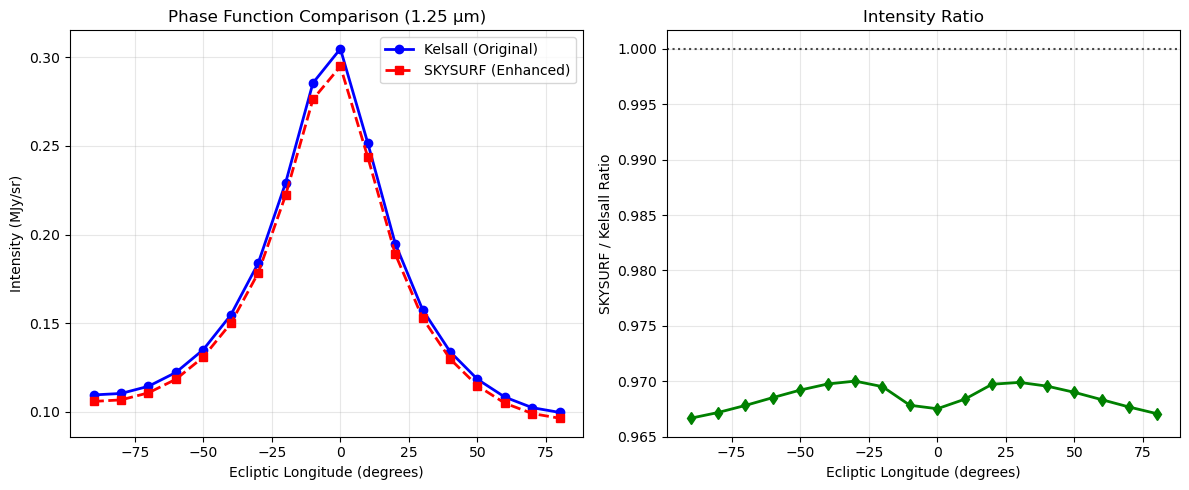

Phase Function Comparison:
  Kelsall mean: 0.162008 MJy/sr
  SKYSURF mean: 0.156920 MJy/sr
  Mean ratio: 0.9685
  Ratio range: 0.9667 - 0.9700


In [15]:
# Compare both phase functions
wavelength = 1.25  # Supported by both models
day = 180.0
lon = 0.0  # Every 15 degrees
latitude_array = np.arange(-90, 90, 10)

# Calculate with both phase functions
zodi_kelsall = get_zmod(wavelength, 'kelsall', day, lon, latitude_array)
zodi_skysurf = get_zmod(wavelength, 'skysurf', day, lon, latitude_array)

# Create comparison plot
plt.figure(figsize=(12, 5))

# Intensity comparison
plt.subplot(1, 2, 1)
plt.plot(latitude_array, zodi_kelsall, 'b-', linewidth=2, label='Kelsall (Original)', marker='o')
plt.plot(latitude_array, zodi_skysurf, 'r--', linewidth=2, label='SKYSURF (Enhanced)', marker='s')
plt.xlabel('Ecliptic Longitude (degrees)')
plt.ylabel('Intensity (MJy/sr)')
plt.title(f'Phase Function Comparison ({wavelength} μm)')
plt.legend()
plt.grid(True, alpha=0.3)

# Ratio plot
plt.subplot(1, 2, 2)
ratio = zodi_skysurf / zodi_kelsall
plt.plot(latitude_array, ratio, 'g-', linewidth=2, marker='d')
plt.axhline(y=1.0, color='k', linestyle=':', alpha=0.7)
plt.xlabel('Ecliptic Longitude (degrees)')
plt.ylabel('SKYSURF / Kelsall Ratio')
plt.title('Intensity Ratio')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"Phase Function Comparison:")
print(f"  Kelsall mean: {np.mean(zodi_kelsall):.6f} MJy/sr")
print(f"  SKYSURF mean: {np.mean(zodi_skysurf):.6f} MJy/sr")
print(f"  Mean ratio: {np.mean(ratio):.4f}")
print(f"  Ratio range: {np.min(ratio):.4f} - {np.max(ratio):.4f}")

## Summary

These four examples demonstrate the core capabilities of ZodiModel:

1. **Single Point**: Basic usage with the Kelsall model for standard calculations
2. **SKYSURF**: Enhanced model with custom wavelengths and improved phase function
3. **Array Processing**: Efficient batch calculations with visualization
4. **Model Comparison**: Side-by-side comparison of phase functions

### Key Points:
- **Return Values**: `get_zmod()` always returns a NumPy array, even for scalar inputs
- **Phase Functions**: 
  - `'kelsall'`: Original DIRBE-based model (1.25-240 μm)
  - `'skysurf'`: Enhanced HST-optimized model (0.2-4.85 μm)
- **Coordinates**: Ecliptic system (longitude, latitude) in degrees
- **Time**: Day numbers since 1990.0 (e.g., 0 = 1990-01-01, 365.25 = 1991-01-01)
- **Efficiency**: Use array inputs for batch processing

### Validation:
This Python implementation has been calibrated to match the original IDL code within **0.0002%** accuracy through:
- Component-by-component verification
- Complete parameter mapping
- Numerical precision testing
